In [3]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForTokenClassification

In [4]:
# '''
# Get the raw phee dataset. Give it to clinical BERT model. Save the results in csv files.
# Sentence_ID
# Org_Sentence: original sentence (the version in phee)
# Org_Tag: original tag (the version in phee)
# Sentence: tokenized sentence (with bert tokenizer)
# Tag: tags that come from clinical BERT model
# '''
# files = ['train', 'dev', 'test']
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# tokenizer = AutoTokenizer.from_pretrained("samrawal/bert-base-uncased_clinical-ner")
# model = AutoModelForTokenClassification.from_pretrained("samrawal/bert-base-uncased_clinical-ner")
# model.to(device)

# def process_sentence(sentence):
#     inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, add_special_tokens=True).to(device)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     predictions = torch.argmax(outputs.logits, dim=2)[0]
#     labels = [model.config.id2label[label_id.item()] for label_id in predictions[1:-1].cpu()]  # Exclude [CLS], [SEP]
#     united_labels = []
#     united_tokens = []
#     # ignore words that are split into subwords
    
#     for token, label in zip(tokenizer.tokenize(sentence), labels):
#         if token.startswith('##'):
#             united_tokens[-1] = united_tokens[-1] + token[2:]
#             continue
#         united_tokens.append(token)
#         united_labels.append(label)

#     return united_tokens, united_labels

# def preprocess(file_name):
#     # Reading the file and creating a DataFrame
#     with open(f'data/raw/phee/ace/{file_name}.txt', 'r') as file:
#         lines = file.readlines()

#     words, tags, sentence_ids = [], [], []
#     sentence_id = 0

#     for line in lines:
#         if line.strip() == '':  # Check for empty line indicating end of sentence
#             sentence_id += 1
#         else:
#             word, tag = line.strip().split()
#             words.append(word)
#             tags.append(tag)
#             sentence_ids.append(sentence_id)

#     # Creating DataFrame
#     df = pd.DataFrame({'Sentence_ID': sentence_ids, 'Word': words, 'Org_Tag': tags})

#     df_s = df.groupby('Sentence_ID').agg({
#         'Word': lambda x: ' '.join(x),
#         'Org_Tag': lambda x: ' '.join(x)
#         }).reset_index()

#     df_s = df_s.rename(columns={"Word": "Org_Sentence"})

#     df_s['Result'] = df_s['Org_Sentence'].apply(process_sentence)
#     df_s[['Sentence', 'Tag']] = pd.DataFrame(df_s['Result'].tolist(), index=df_s.index)
#     df_s['Sentence'] = df_s['Sentence'].apply(lambda x: ' '.join(x))
#     df_s['Tag'] = df_s['Tag'].apply(lambda x: ' '.join(x))

#     # drop results column
#     df_s = df_s.drop(columns=['Result'])
    
#     # save to csv
#     df_s.to_csv(f'data/processed/phee/ace/{file_name}.csv', index=False)

#     return df_s

# for file_name in files:
#     preprocess(file_name)



In [5]:
# def update_t_capital(row):
#     new_tags = []
#     for tag, org_tag in zip(row['Tag'].split(), row['Org_Tokenized_Tag'].split()):
#         if tag == 'I-test':
#             new_tags.append('I-Test')
#         else:
#             new_tags.append(org_tag)
#     return ' '.join(new_tags)

# files = ['train', 'dev', 'test']
# for file_name in files:
#     df = pd.read_csv(f'data/processed/phee/ace/{file_name}.csv')
#     # df_unequal contains the sentences that become different after bert tokenizer (e.g. org-> I' m , bert-> I ' m)
#     df_unequal = df[(df['Tag'].str.split().apply(lambda x: len(x)) != df['Org_Tag'].str.split().apply(lambda x: len(x)))]
#     df_unequal.reset_index(drop=True, inplace=True)

#     for i in range(len(df_unequal)):
#         j = 0
#         k = 0
#         while j < len(df_unequal['Sentence'][i].split()):
#             if df_unequal['Sentence'][i].split()[j].lower() != df_unequal['Org_Sentence'][i].split()[k].lower():
            
#                 # word in tokenized sentence
#                 word = df_unequal['Sentence'][i].split()[j] 
#                 while(word.lower() != df_unequal['Org_Sentence'][i].split()[k].lower()):
                    
#                     # print('word: ', word, 'word2 ', df_unequal['Org_Sentence'][i].split()[k].lower())
#                     word = word + df_unequal['Sentence'][i].split()[j+1]
#                     str_arr = df_unequal['Org_Tag'][i].split()
#                     str_arr.insert(k+1,  df_unequal['Org_Tag'][i].split()[k])
#                     df_unequal.loc[i, 'Org_Tag'] = ' '.join(str_arr)
#                     j = j + 1
#             k = k + 1
#             j = j + 1
            
#     # create a copy of df['Org_Tag'] column
#     df['Org_Tokenized_Tag'] = df['Org_Tag'] 

#     update_values = df['Sentence_ID'].map(df_unequal.set_index('Sentence_ID')['Org_Tag'])
#     df['Org_Tokenized_Tag'] = update_values.combine_first(df['Org_Tokenized_Tag'])  

#     # I-test -> I-Test
#     df['Org_Tokenized_Tag'] = df.apply(update_t_capital, axis=1)

#     # save to csv
#     df.to_csv(f'data/processed/phee/ace/{file_name}_w_test_tag.csv', index=False)
    

In [6]:
# treatment_tags = [
#     "I-Treatment.Drug",
#     "I-Treatment.Combination.Drug",
#     "I-Treatment",
#     "I-Treatment.Route",
#     "I-Treatment.Dosage",
#     "I-Combination.Drug",
#     "I-Treatment.Duration",
#     "I-Dosage",
#     "I-Freq",
#     "I-Drug",
#     "I-Treatment.Time_elapsed",
#     "I-Treatment.Freq"
# ]

# # Map to the new tag
# treatment_mapping = {tag: "I-Treatment" for tag in treatment_tags}

# problem_tags = [
#     "I-Effect",
#     "I-Treat_Disorder",
#     "I-Treatment.Treat_Disorder",
#     "I-Subject.Sub_Disorder",
#     "I-Sub_Disorder"
# ]

# # Map to the new tag
# problem_mapping = {tag: "I-Problem" for tag in problem_tags}

# background_tags = [
#     "I-Subject.Age",
#     "I-Subject.Gender",
#     "I-Subject.Race",
#     "I-Subject",
#     "I-Race",
#     "I-Gender"
# ]

# # Map to the new tag
# background_mapping = {tag: "I-Background" for tag in background_tags}

# other_tags = [
#     "I-Duration",
#     "I-Time_elapsed"
# ]

# # Map to the new tag
# other_mapping = {tag: "I-Other" for tag in other_tags}

# o_tags = [
#     "I-Subject.Population",
#     "I-Potential_therapeutic_event.Trigger",
#     "I-Adverse_event.Trigger",
#     "I-Route",
#     "I-Population",
#     "O"
# ]

# # Map to the new tag
# o_mapping = {tag: "O" for tag in o_tags}

# test_tags = [
#     "I-Test"
# ]

# test_mapping = {tag: "I-Test" for tag in test_tags}

# # Combine all mappings
# all_mappings = {**treatment_mapping, **problem_mapping, **background_mapping, **other_mapping, **o_mapping, **test_mapping}

# def map_tags(tag_string):
#     return ' '.join(all_mappings.get(tag, tag) for tag in tag_string.split())

# files = ['train', 'dev', 'test']
# for file_name in files:
#     df_w_t = pd.read_csv(f'data/processed/phee/ace/{file_name}_w_test_tag.csv')
#     df_w_t["Med_Tag"] = df_w_t["Org_Tokenized_Tag"].apply(map_tags)
#     # save to csv
#     df_w_t.to_csv(f'data/processed/phee/ace/{file_name}_w_test_tag_mapped.csv', index=False)


In [64]:
df = pd.read_csv(f'data/processed/phee/ace/{file_name}.csv')

In [65]:
df_unequal = df[(df['Tag'].str.split().apply(lambda x: len(x)) != df['Org_Tag'].str.split().apply(lambda x: len(x)))]

In [66]:
df_unequal.reset_index(drop=True, inplace=True)
df_unequal

,Sentence_ID,Org_Sentence,Org_Tag,Sentence,Tag
0,0,OBJECTIVE : To test the hypothesis that tumor ...,O O O O O O O O O O O O O O O O O O O O O O O ...,objective : to test the hypothesis that tumor ...,O O O O O O O B-treatment I-treatment I-treatm...
1,4,"According to the Naranjo probability scale , f...",O O O O O O O I-Treatment.Drug O O O I-Adverse...,"according to the naranjo probability scale , f...",O O B-test O I-test I-test O B-treatment O O O...
2,42,Warfarin - associated bleeding generally is co...,I-Treatment.Drug O I-Adverse_event.Trigger I-E...,warfarin - associated bleeding generally is co...,B-problem I-problem I-problem I-problem O O O ...
3,45,"We report the case of a man , treated with mes...",O O O O O I-Subject I-Subject.Gender O O O I-T...,"we report the case of a man , treated with mes...",O O O O O O O O O O B-treatment O B-problem I-...
4,46,We report the occurrence of spontaneous intrac...,O O O I-Adverse_event.Trigger O I-Effect I-Eff...,we report the occurrence of spontaneous intrac...,O O O O O B-problem I-problem I-problem O B-pr...
...,...,...,...,...,...
237,2870,Graves ' hyperthyroidism following transient t...,I-Effect I-Effect I-Effect I-Effect I-Effect I...,graves ' hyperthyroidism following transient t...,B-problem I-problem I-problem O B-problem I-pr...
238,2929,We report a case of Thrombotic Thrombocytopeni...,O O O O O I-Effect I-Effect I-Effect O O O I-E...,we report a case of thrombotic thrombocytopeni...,O O O O O B-problem I-problem I-problem O O O ...
239,2959,Horner 's syndrome and demyelinating periphera...,I-Effect I-Effect I-Effect I-Effect I-Effect I...,horner ' s syndrome and demyelinating peripher...,B-problem I-problem I-problem I-problem O B-pr...
240,2960,Fatal radiation myelopathy after high - dose b...,O I-Effect I-Effect I-Adverse_event.Trigger I-...,fatal radiation myelopathy after high - dose b...,B-problem I-problem I-problem O B-treatment I-...


In [67]:
for i in range(len(df_unequal)):
    j = 0
    k = 0
    while j < len(df_unequal['Sentence'][i].split()):
        if df_unequal['Sentence'][i].split()[j].lower() != df_unequal['Org_Sentence'][i].split()[k].lower():
          
            # word in tokenized sentence
            word = df_unequal['Sentence'][i].split()[j] 
            while(word.lower() != df_unequal['Org_Sentence'][i].split()[k].lower()):
                
                # print('word: ', word, 'word2 ', df_unequal['Org_Sentence'][i].split()[k].lower())
                word = word + df_unequal['Sentence'][i].split()[j+1]
                str_arr = df_unequal['Org_Tag'][i].split()
                str_arr.insert(k+1,  df_unequal['Org_Tag'][i].split()[k])
                df_unequal.loc[i, 'Org_Tag'] = ' '.join(str_arr)
                j = j + 1
        k = k + 1
        j = j + 1

In [68]:
# Are there any tags that have different lengths?
sum(df_unequal['Tag'].str.split().apply(lambda x: len(x)) != df_unequal['Org_Tag'].str.split().apply(lambda x: len(x)))

0

In [69]:
len(df_unequal['Org_Tag'][0].split())

41

In [70]:
len(df_unequal['Org_Tag'][0].split())

41

In [71]:
# create a copy of df['Org_Tag'] column
df['Org_Tokenized_Tag'] = df['Org_Tag'] 

In [72]:
update_values = df['Sentence_ID'].map(df_unequal.set_index('Sentence_ID')['Org_Tag'])
df['Org_Tokenized_Tag'] = update_values.combine_first(df['Org_Tokenized_Tag'])

In [73]:
len(df['Org_Tokenized_Tag'][0].split())

41

In [74]:
df[['Tag', 'Org_Tokenized_Tag']]

,Tag,Org_Tokenized_Tag
0,O O O O O O O B-treatment I-treatment I-treatm...,O O O O O O O O O O O O O O O O O O O O O O O ...
1,B-test I-test I-test O O O O O O O O O O O O O...,O O O O O O O O O O O I-Subject.Gender I-Subje...
2,B-problem I-problem O O O O O O O O O,I-Treatment.Drug I-Effect I-Adverse_event.Trig...
3,O O O O O O B-problem I-problem O B-problem I-...,O O O O O O I-Effect I-Effect I-Effect I-Effec...
4,O O B-test O I-test I-test O B-treatment O O O...,O O O O O O O I-Treatment.Drug O O O I-Adverse...
...,...,...
3001,B-treatment I-treatment I-problem O B-problem ...,I-Treatment.Drug I-Treatment.Drug I-Treatment....
3002,O O O O O O O O B-problem I-problem I-problem ...,I-Subject I-Subject.Age I-Subject.Age I-Subjec...
3003,O B-problem I-problem O O O O O O O B-problem ...,I-Subject I-Subject.Sub_Disorder I-Subject.Sub...
3004,O O O O B-treatment O B-treatment I-treatment ...,I-Time_elapsed I-Treatment.Time_elapsed I-Trea...


In [75]:
# Check wheather the tags have different lengths
sum(df['Tag'].str.split().apply(lambda x: len(x)) != df['Org_Tokenized_Tag'].str.split().apply(lambda x: len(x)))

0

In [76]:
def update_tags(row):
    new_tags = []
    for tag, org_tag in zip(row['Tag'].split(), row['Org_Tokenized_Tag'].split()):
        if tag == 'I-test':
            new_tags.append('I-Test')
        else:
            new_tags.append(org_tag)
    return ' '.join(new_tags)

df['Org_Tokenized_Tag'] = df.apply(update_tags, axis=1)

In [77]:
# save to csv
df.to_csv(f'data/processed/phee/ace/train_w_test_tag.txt.csv', index=False)

In [79]:

df_w_t = pd.read_csv('data/processed/phee/ace/train_w_test_tag.txt.csv')


In [80]:
#unique tags in org_tag
df_w_t['Org_Tokenized_Tag'].str.split().explode().unique()

array(['O', 'I-Treatment.Drug', 'I-Adverse_event.Trigger', 'I-Test',
       'I-Treat_Disorder', 'I-Subject.Gender', 'I-Subject',
       'I-Subject.Age', 'I-Treatment', 'I-Treatment.Treat_Disorder',
       'I-Effect', 'I-Treatment.Route', 'I-Treatment.Combination.Drug',
       'I-Combination.Drug', 'I-Subject.Race', 'I-Subject.Population',
       'I-Subject.Sub_Disorder', 'I-Time_elapsed', 'I-Treatment.Duration',
       'I-Treatment.Dosage', 'I-Potential_therapeutic_event.Trigger',
       'I-Drug', 'I-Treatment.Freq', 'I-Treatment.Time_elapsed',
       'I-Sub_Disorder', 'I-Route', 'I-Dosage', 'I-Freq', 'I-Duration',
       'I-Race', 'I-Gender', 'I-Population'], dtype=object)

In [120]:
# Get unique tags

# print(set(all_tags))
# unique_tags = df['Tag'].unique()

# # Print the count of unique tags
# print(f"There are {len(unique_tags)} types of tags in the dataset.")

# # Print each unique tag
# print("The tags are:")
# for tag in unique_tags:
#     print(tag)

['[', "'", 'O', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'B', '-', 't', 'r', 'e', 'a', 't', 'm', 'e', 'n', 't', "'", ',', ' ', "'", 'I', '-', 't', 'r', 'e', 'a', 't', 'm', 'e', 'n', 't', "'", ',', ' ', "'", 'I', '-', 't', 'r', 'e', 'a', 't', 'm', 'e', 'n', 't', "'", ',', ' ', "'", 'I', '-', 't', 'r', 'e', 'a', 't', 'm', 'e', 'n', 't', "'", ',', ' ', "'", 'I', '-', 't', 'r', 'e', 'a', 't', 'm', 'e', 'n', 't', "'", ',', ' ', "'", 'I', '-', 't', 'r', 'e', 'a', 't', 'm', 'e', 'n', 't', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'I', '-', 't', 'r', 'e', 'a', 't', 'm', 'e', 'n', 't', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'B', '-', 'p', 'r', 'o', 'b', 'l', 'e', 'm', "'", ',', ' ', "'", 'I', '-', 'p', 'r', 'o', 'b', 'l', 'e', 'm', "'", ',', ' ', "'", 'O', "'", ',', ' ', "'", 'B', '-', 'p', 'r', 'o', 'b', 'l', 'e', 'm', "'", ',', ' ',

In [103]:
# # Prepare text
# text = ['She got the flu .']
# inputs = tokenizer(text, is_split_into_words=False, return_tensors="pt", padding=True, truncation=True, add_special_tokens=True)

# inputs = {key: value.to(device) for key, value in inputs.items()}

# # Get entity labels
# with torch.no_grad():
#     outputs = model(**inputs)
# predictions = torch.argmax(outputs.logits, dim=2)

# # Convert label IDs to label strings
# label_ids = predictions[0].tolist()
# labels = [model.config.id2label[label_id] for label_id in label_ids]

# # Exclude the labels for [CLS] and [SEP] tokens
# labels = labels[1:-1]

# # Now output labels
# for token, label in zip(tokenizer.tokenize(text[0]), labels):
#     print(f'{token}: {label}')


In [81]:
treatment_tags = [
    "I-Treatment.Drug",
    "I-Treatment.Combination.Drug",
    "I-Treatment",
    "I-Treatment.Route",
    "I-Treatment.Dosage",
    "I-Combination.Drug",
    "I-Treatment.Duration",
    "I-Dosage",
    "I-Freq",
    "I-Drug",
    "I-Treatment.Time_elapsed",
    "I-Treatment.Freq"
]

# Map to the new tag
treatment_mapping = {tag: "I-Treatment" for tag in treatment_tags}

In [82]:
problem_tags = [
    "I-Effect",
    "I-Treat_Disorder",
    "I-Treatment.Treat_Disorder",
    "I-Subject.Sub_Disorder",
    "I-Sub_Disorder"
]

# Map to the new tag
problem_mapping = {tag: "I-Problem" for tag in problem_tags}

In [83]:
background_tags = [
    "I-Subject.Age",
    "I-Subject.Gender",
    "I-Subject.Race",
    "I-Subject",
    "I-Race",
    "I-Gender"
]

# Map to the new tag
background_mapping = {tag: "I-Background" for tag in background_tags}

In [84]:
other_tags = [
    "I-Duration",
    "I-Time_elapsed"
]

# Map to the new tag
other_mapping = {tag: "I-Other" for tag in other_tags}


In [85]:
o_tags = [
    "I-Subject.Population",
    "I-Potential_therapeutic_event.Trigger",
    "I-Adverse_event.Trigger",
    "I-Route",
    "I-Population",
    "O"
]

# Map to the new tag
o_mapping = {tag: "O" for tag in o_tags}


In [86]:
test_tags = [
    "I-Test"
]

test_mapping = {tag: "I-Test" for tag in test_tags}

In [89]:
df_w_t["Org_Tokenized_Tag"]

0       O O O O O O O O O O O O O O O O O O O O O O O ...
1       O I-Test I-Test O O O O O O O O I-Subject.Gend...
2       I-Treatment.Drug I-Effect I-Adverse_event.Trig...
3       O O O O O O I-Effect I-Effect I-Effect I-Effec...
4       O O O O I-Test I-Test O I-Treatment.Drug O O O...
                              ...                        
3001    I-Treatment.Drug I-Treatment.Drug I-Treatment....
3002    I-Subject I-Subject.Age I-Subject.Age I-Subjec...
3003    I-Subject I-Subject.Sub_Disorder I-Subject.Sub...
3004    I-Time_elapsed I-Treatment.Time_elapsed I-Trea...
3005    I-Effect I-Effect I-Adverse_event.Trigger I-Tr...
Name: Org_Tokenized_Tag, Length: 3006, dtype: object

In [90]:
# Combine all mappings
all_mappings = {**treatment_mapping, **problem_mapping, **background_mapping, **other_mapping, **o_mapping, **test_mapping}

def map_tags(tag_string):
    return ' '.join(all_mappings.get(tag, tag) for tag in tag_string.split())

df_w_t["Med_Tag"] = df_w_t["Org_Tokenized_Tag"].apply(map_tags)


In [95]:
df_w_t['Org_Sentence'][4]

"According to the Naranjo probability scale , flecainide was the probable cause of the patient 's delirium ; the Horn Drug Interaction Probability Scale indicates a possible pharmacokinetic drug interaction between flecainide and paroxetine ."

In [91]:
df_w_t

,Sentence_ID,Org_Sentence,Org_Tag,Sentence,Tag,Org_Tokenized_Tag,Med_Tag
0,0,OBJECTIVE : To test the hypothesis that tumor ...,O O O O O O O O O O O O O O O O O O O O O O O ...,objective : to test the hypothesis that tumor ...,O O O O O O O B-treatment I-treatment I-treatm...,O O O O O O O O O O O O O O O O O O O O O O O ...,O O O O O O O O O O O O O O O O O O O O O O O ...
1,1,An evaluation of ovarian structure and functio...,O O O O O O O O O O O I-Subject.Gender I-Subje...,an evaluation of ovarian structure and functio...,B-test I-test I-test O O O O O O O O O O O O O...,O I-Test I-Test O O O O O O O O I-Subject.Gend...,O I-Test I-Test O O O O O O O O I-Background I...
2,2,Phenobarbital hepatotoxicity in an 8 - month -...,I-Treatment.Drug I-Effect I-Adverse_event.Trig...,phenobarbital hepatotoxicity in an 8 - month -...,B-problem I-problem O O O O O O O O O,I-Treatment.Drug I-Effect I-Adverse_event.Trig...,I-Treatment I-Problem O I-Background I-Backgro...
3,3,The authors report a case of Balint syndrome w...,O O O O O O I-Effect I-Effect I-Effect I-Effec...,the authors report a case of balint syndrome w...,O O O O O O B-problem I-problem O B-problem I-...,O O O O O O I-Effect I-Effect I-Effect I-Effec...,O O O O O O I-Problem I-Problem I-Problem I-Pr...
4,4,"According to the Naranjo probability scale , f...",O O O O O O O I-Treatment.Drug O O O I-Adverse...,"according to the naranjo probability scale , f...",O O B-test O I-test I-test O B-treatment O O O...,O O O O I-Test I-Test O I-Treatment.Drug O O O...,O O O O I-Test I-Test O I-Treatment O O O O O ...
...,...,...,...,...,...,...,...
3001,3001,L - T4 stimulated lymphocyte transformation in...,I-Treatment.Drug I-Treatment.Drug I-Treatment....,l - t4 stimulated lymphocyte transformation in...,B-treatment I-treatment I-problem O B-problem ...,I-Treatment.Drug I-Treatment.Drug I-Treatment....,I-Treatment I-Treatment I-Treatment O I-Proble...
3002,3002,A 53 - year - old man developed lower leg edem...,I-Subject I-Subject.Age I-Subject.Age I-Subjec...,a 53 - year - old man developed lower leg edem...,O O O O O O O O B-problem I-problem I-problem ...,I-Subject I-Subject.Age I-Subject.Age I-Subjec...,I-Background I-Background I-Background I-Backg...
3003,3003,A mentally retarded 23 - year - old woman with...,I-Subject I-Subject.Sub_Disorder I-Subject.Sub...,a mentally retarded 23 - year - old woman with...,O B-problem I-problem O O O O O O O B-problem ...,I-Subject I-Subject.Sub_Disorder I-Subject.Sub...,I-Background I-Problem I-Problem I-Background ...
3004,3004,"After 5 days of treatment with IL - 2 , the pa...",I-Time_elapsed I-Treatment.Time_elapsed I-Trea...,"after 5 days of treatment with il - 2 , the pa...",O O O O B-treatment O B-treatment I-treatment ...,I-Time_elapsed I-Treatment.Time_elapsed I-Trea...,I-Other I-Treatment I-Treatment I-Treatment I-...


In [92]:
# save to csv
df_w_t.to_csv(f'data/processed/phee/ace/train_w_test_tag_mapped.txt.csv', index=False)

In [9]:
# read csv
dev_data = pd.read_csv('data/processed/phee/ace/dev_w_test_tag_mapped.csv')

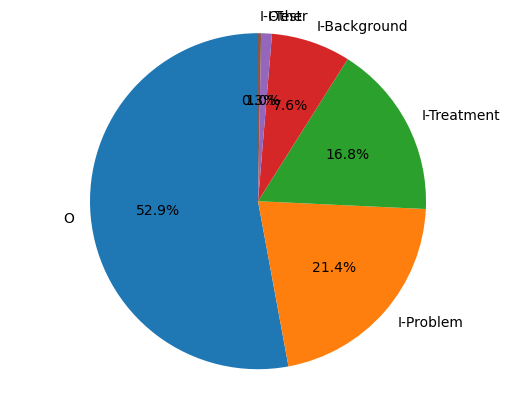

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assume df_w_t is your DataFrame
all_tags = ' '.join(dev_data['Med_Tag']).split()
tag_counts = Counter(all_tags)

# Create a DataFrame from the tag counts
tag_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Plot
fig, ax = plt.subplots()
ax.pie(tag_df['Count'], labels=tag_df['Tag'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

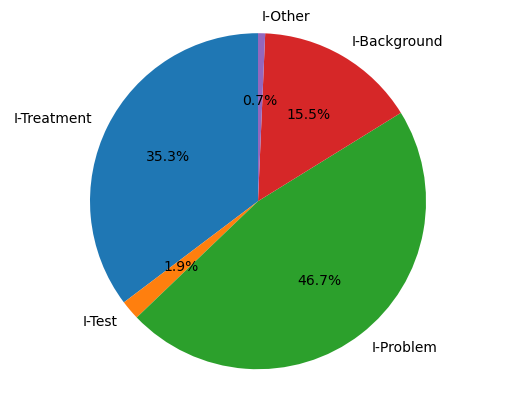

In [98]:
# Remove 'O' tag count
tag_counts.pop('O', None)

# Create a DataFrame from the updated tag counts
tag_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Plot
fig, ax = plt.subplots()
ax.pie(tag_df['Count'], labels=tag_df['Tag'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.show()